# Python Native API in IRIS 2019.2

InterSystems has just released a new version of IRIS Data Platform, with one very good additional feature called Python Native API. This offers an additional flexibility towards how can you access data inside of IRIS Data Platform, aside from a regular JDBC connection.

In this example notebook, I have played with famous InterSystems Globals, an essential piece of how the data is stored inside IRIS Data Platform.

## Prerequisites

Before you start, be sure that you installed everything required, as mentioned in the [instructions](https://irisdocs.intersystems.com/irislatest/csp/docbook/DocBook.UI.Page.cls?KEY=AFL_pynative).
I used here also the [graphviz](https://www.graphviz.org/), so take care to have it installed. If you are a mac user, I installed using `brew install graphviz`, or if you dont have brew then follow this [link](http://macappstore.org/graphviz/)

## Connecting the IRIS

Connecting to iris fairly simple. You need an host address and port, namespace, username and password as parameters.

In [207]:
import irisnative

# create database connection and IRIS instance
connection = irisnative.createConnection("localhost", 
        51773, 
        "USER", 
        "_SYSTEM", 
        "SYS")
iris = irisnative.createIris(connection)

Let's add globals data, as shown on [Globals QuickStart](https://learning.intersystems.com/course/view.php?id=1051) video.

In [208]:
iris.set("John Smith","Persons","1","Name")
iris.set("jsmith1234@gmail.com","Persons","1","Email","Home")
iris.set("jsmith@somework.com","Persons","1","Email","Work")
iris.set("123 High St.","Persons","1","Address","Street")
iris.set("Cambridge","Persons","1","Address","City")
iris.set("MA","Persons","1","Address","State")
iris.set("02138","Persons","1","Address","Zip")

iris.set("Mary Jones","Persons","2","Name")
iris.set("mjones5678@email.com","Persons","2","Email","Home")
iris.set("67 Bennett Ave., Boston, MA 02111","Persons","2","Address")
iris.set("Cell","Persons","2","Phone","1","Type")
iris.set("333-333-3333","Persons","2","Phone","1","Number")
iris.set("Business","Persons","2","Phone","2","Type")
iris.set("111-111-1111","Persons","2","Phone","2","Number")
iris.set("Home","Persons","2","Phone","2","Type")
iris.set("555-555-5555","Persons","2","Phone","2","Number")

iris.set("Lena Strait","Persons","3","Name")
iris.set("lstrait59@email.com","Persons","3","Email","Home")
iris.set("124 Main St.","Persons","3","Address","Street")
iris.set("Syracuse","Persons","3","Address","City")
iris.set("NY","Persons","3","Address","State")
iris.set("13211","Persons","3","Address","Zip")
iris.set("444-444-4444","Persons","3","CellPhone")

This part is related to Python in general, if any API is not clear, it is always good to use help function to get more information 

In [209]:
#help(irisnative.createConnection)

The following code creates a graphviz's dot syntax to generate graph based on values of Global variable.
This dot syntax is then given to the Graphviz's dot which generates SVG file.

In [210]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def displayTree(root):
    iterRoot = iris.iterator(root)
    
    text = 'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\nedge [fontsize=10,fillcolor="white", decorate="True",labeljust="c"];'
    text += 'label="'+root+' Global";\nlabelloc="t";\n'
    state = iris.isDefined(root)
    hasValue = (state%10 > 0) # has value if state is 1 or 11
    hasChild = (state > 9)    # has child if state is 10 or 11
    if (hasValue):  # ignore valueless nodes
        value = iris.get(root)
        nodeText= "%s [label=\"%i\", fillcolor=\"#39e5811a\"] ;" % (root,value)
    else:
        nodeText= "%s [label=\"\" fillcolor=\"#39e5811a\"] ;" % (root)

    text += nodeText+"\n"
    if hasChild:
        # Iterate over children of root node heroes
        for sub1,value in iterRoot:
            text += testNode(value,root,*[sub1])
    text += '}'
    graph = Source(text)
    display(SVG(graph.pipe(format='svg')))



def testNode(value, root, *subs):
    text = ""
    # Test for values and child nodes
    state = iris.isDefined(root,*subs)
    hasValue = (state%10 > 0) # has value if state is 1 or 11
    hasChild = (state > 9)    # has child if state is 10 or 11

    link = ""
    nodeTextId=root+'_'+'_'.join(subs)
    nodeTextIdParent=root+'_'+'_'.join(subs[:-1])
    # format the node address output string
    if len(subs)>1:
        link = "%s -> %s [labeldistance=2, label=\" %s  \"] ;" % (nodeTextIdParent,nodeTextId,subs[-1])
    else:
        link = "%s -> %s [labeldistance=2, label=\" %s  \"] ;" % (root,nodeTextId,subs[-1])
    
    # Add node value and note special cases
    if (hasValue):  # ignore valueless nodes
        nodeText= "%s [label=\"%s\", fillcolor=\"#39e5811a\"] ;" % (nodeTextId,str(value))
    else:
        nodeText= "%s [label=\"\" fillcolor=\"#39e5811a\"] ;" % (nodeTextId)
    text= "%s\n%s\n" % (link,nodeText)
    if hasChild:
        iterUnder=iris.iterator(root,*subs)
        for subUnder, value2 in iterUnder:
            subDeeper=list(subs)
            subDeeper.append(subUnder)
            text += testNode(value2,root,*subDeeper)
    return text

Now let's try the above code with newly created Global "Persons. 
The tree represents how the globals contents are being stored. 
You can notice that not every node has value in it, neither that it requires any specific structure. 

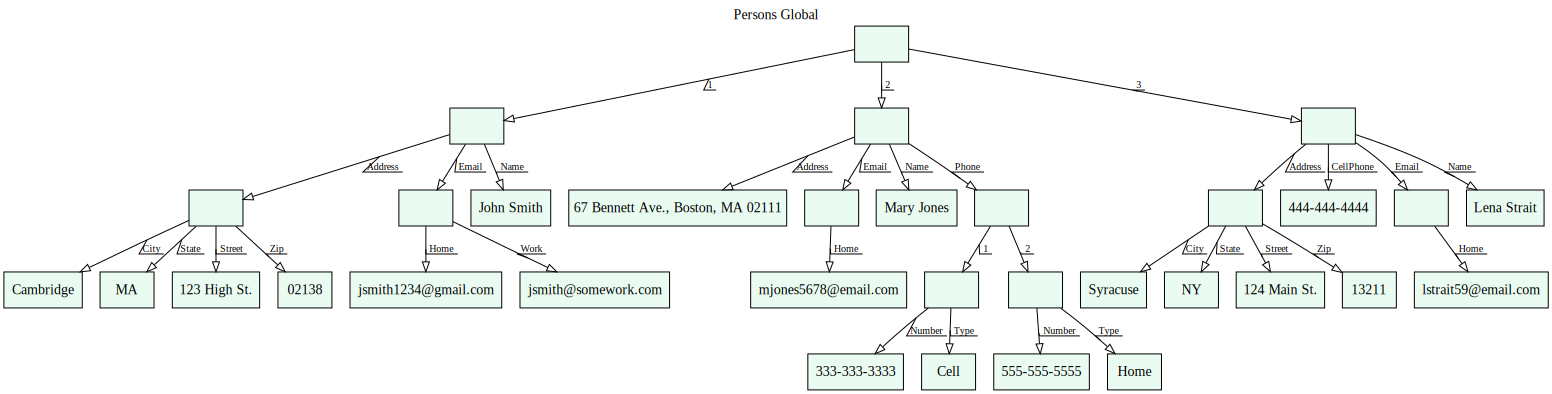

In [211]:
displayTree('Persons')

In [212]:
# close connection
connection.close()